In [57]:
import numpy as np
import itertools
import matplotlib.pyplot as plt


In [58]:
# Exercise 1
def G(row_s, Temp):
    return np.exp(1/Temp * row_s[:-1]@row_s[1:].T)


In [59]:

# Exercise 2
def F(row_s, row_t, Temp):
    return np.exp(1/Temp * row_s@row_t.T)


In [60]:
# exercise 3
# to achive the Ztemp definition we can combine G and F with exponent multipication rules
def Ztemp_2(Temp):
    # options = np.array(np.meshgrid([-1,1],[-1,1])).T.reshape(-1,2)
    options = itertools.product([-1,1], repeat = 4)
    res = 0
    for option in options:
        grid = np.array(option).reshape(2,2)
        row_s = grid[0]
        row_t = grid[1]
        res += G(row_s,Temp)*G(row_t,Temp)*F(row_s,row_t,Temp);
    return res
print("Temp:1, size: 2x2, Ztemp: ",Ztemp_2(1))
print("Temp:1.5, size: 2x2, Ztemp: ",Ztemp_2(1.5))
print("Temp:2, size: 2x2, Ztemp: ",Ztemp_2(2))


Temp:1, size: 2x2, Ztemp:  121.23293134406595
Temp:1.5, size: 2x2, Ztemp:  40.922799092745386
Temp:2, size: 2x2, Ztemp:  27.048782764334526


In [61]:
# Exercise 4
def Ztemp_3(Temp):
    # options = np.array(np.meshgrid([-1,1],[-1,1])).T.reshape(-1,2)
    options = itertools.product([-1,1], repeat = 9)
    res = 0
    for option in options:
        grid = np.array(option).reshape(3,3)
        
        res += G(grid[0],Temp)*G(grid[1],Temp)*G(grid[2],Temp) \
                *F(grid[0],grid[1],Temp)*F(grid[1],grid[2],Temp);
    return res
print("Temp:1, size: 3x3, Ztemp: ",Ztemp_3(1))
print("Temp:1.5, size: 3x3, Ztemp: ",Ztemp_3(1.5))
print("Temp:2, size: 3x3, Ztemp: ",Ztemp_3(2))


Temp:1, size: 3x3, Ztemp:  365645.7491357704
Temp:1.5, size: 3x3, Ztemp:  10565.421983514265
Temp:2, size: 3x3, Ztemp:  2674.518123060087


In [62]:
# Exrecise 5+6
def y2row(y,width=8):
    """
    y: an integer in (0,...,(2**width)-1)
    """
    if not 0<=y<=(2**width)-1:
        raise ValueError(y)
    my_str=np.binary_repr(y,width=width)
    # my_list = map(int,my_str) # Python 2
    my_list = list(map(int,my_str)) # Python 3
    my_array = np.asarray(my_list)
    my_array[my_array==0]=-1
    row=my_array
    return row

def Ztemp_ys(Temp, size):
    res =0
    for yS in itertools.product([y2row(num,size) for num in range(2**size)], repeat=size):
        inner_res = 1 
        for y_i in yS:
            inner_res *= G(y_i,Temp)
        for i in range(size-1):
            inner_res *= F(yS[i],yS[i+1],Temp)
        res += inner_res
    return res
print("Temp:1, size: 2x2, Ztemp: ",Ztemp_ys(1,2))
print("Temp:1.5, size: 2x2, Ztemp: ",Ztemp_ys(1.5,2))
print("Temp:2, size: 2x2, Ztemp: ",Ztemp_ys(2,2))
print(" ")
print("Temp:1, size: 3x3, Ztemp: ",Ztemp_ys(1,3))
print("Temp:1.5, size: 3x3, Ztemp: ",Ztemp_ys(1.5,3))
print("Temp:2, size: 3x3, Ztemp: ",Ztemp_ys(2,3))

Temp:1, size: 2x2, Ztemp:  121.23293134406595
Temp:1.5, size: 2x2, Ztemp:  40.922799092745386
Temp:2, size: 2x2, Ztemp:  27.048782764334526
 
Temp:1, size: 3x3, Ztemp:  365645.7491357704
Temp:1.5, size: 3x3, Ztemp:  10565.421983514265
Temp:2, size: 3x3, Ztemp:  2674.518123060087


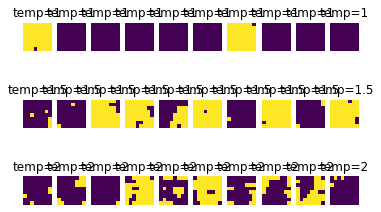

In [64]:
# Exercise 7
def get_Ts(size, Temp):
    Ts = []
    y_range = range(2**size)
    T1 = [sum([G(y2row(y1,size),Temp)*F(y2row(y1,size),y2row(y2,size),Temp) \
                        for y1 in y_range]) \
                            for y2 in y_range]
    Ts.append(T1)
    Tprev = T1
    for _ in range(1,size-1):
        Tnext = [sum([Tprev[y1]*G(y2row(y1,size),Temp)*F(y2row(y1,size),y2row(y2,size),Temp) \
                        for y1 in y_range]) \
                            for y2 in y_range]
        Ts.append(Tnext)
        Tprev = Tnext
    Tlast = sum([Tprev[y]*G(y2row(y,size),Temp) for y in y_range])
    Ts.append(Tlast)
    return Ts

def get_ps(size, Temp, Ts):
    y_range = range(2**size)
    Ztemp = Ts[-1]
    ps = []
    p_first = lambda y: Ts[-2][y]*G(y2row(y,size),Temp)/Ztemp
    ps.append(p_first)
    p_prev = p_first
    for i in range(size-2, 0, -1):
        p_next = lambda y1,y2: Ts[i-1][y1]* G(y2row(y1,size),Temp)*F(y2row(y1,size),y2row(y2,size),Temp) \
              / Ts[i][y2]
        ps.append(p_next)
        p_prev = p_next
    p_last = lambda y1,y2: G(y2row(y1,size),Temp)*F(y2row(y1,size),y2row(y2,size),Temp) / Ts[0][y2]
    ps.append(p_last)
    return ps
# def sample_lattice(size, Temp, Ts):

def single_sample(size, Temp, Ts, ps):
    # Ts = get_Ts(size, Temp)
    # ps = get_ps(size, Temp, Ts)
    sample = []
    y_range = range(2**size)
    y_first = np.random.choice(y_range, p=[ps[0](y) for y in y_range])
    sample.append(y_first)
    y_prev = y_first
    for i in range(1,size):
        y_next =  np.random.choice(y_range, p=[ps[i](y, y_prev) for y in y_range])
        sample.append(y_next)
        y_prev = y_next
    #no need for last
    parsed_sample = np.array([np.array(y2row(y,size)) for y in sample])
    return parsed_sample

def sample_n(n, size, Temp):
    Ts = get_Ts(size, Temp)
    ps = get_ps(size, Temp, Ts)
    samples = np.empty((n,size,size))
    for i in range(n):
        samples[i] = single_sample(size,Temp, Ts, ps)
    return samples


fig, axs = plt.subplots(nrows=3, ncols= 10)
for i, Temp in enumerate([1,1.5,2]):
    exact_samples = sample_n(10, 8, Temp)
    for j, sample in enumerate(exact_samples):
        axs[i,j].imshow(sample, interpolation='None')
        axs[i,j].axis('off')
        if j==0:
            axs[i,j].set_title('temp={}'.format(Temp))




In [55]:
# Exercise 8
for Temp in [1,1.5,2]:
    samples = sample_n(10000, 8, Temp)
    E_1122 = sum([s[1,1]*s[2,2] for s in samples]) / 10000
    E_1188 = sum([s[1,1]*s[8,8] for s in samples]) / 10000
    print("Temp: {}, E_X({},{})X({},{}): {}".format(Temp,1,1,2,2,E_1122))
    print("Temp: {}, E_X({},{})X({},{}): {}".format(Temp,1,1,8,8,E_1188))

ValueError: setting an array element with a sequence.

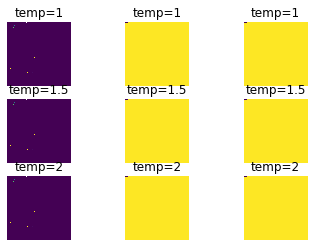

In [45]:
x= [np.empty(10000).reshape(100,100),np.empty(10000).reshape(100,100),np.empty(10000).reshape(100,100),]
y= [np.empty(10000).reshape(100,100),np.empty(10000).reshape(100,100),np.empty(10000).reshape(100,100),]
z= [np.empty(10000).reshape(100,100),np.empty(10000).reshape(100,100),np.empty(10000).reshape(100,100),]
fig, axs = plt.subplots(nrows=3, ncols= 3)
for i, Temp in enumerate([1,1.5,2]):
    for j, sample in enumerate(x):
        axs[i,j].imshow(sample, interpolation='None')
        axs[i,j].axis('off')
        axs[i,j].set_title('temp={}'.format(Temp))